**Calculate Singular-Value Decomposition**

The example below defines a 3×2 matrix and calculates the Singular-value decomposition.

In [1]:
# Singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


Running the example first prints the defined 3×2 matrix, then the 3×3 U matrix, 2 element Sigma vector, and 2×2 V^T matrix elements calculated from the decomposition.

**Reconstruction of Matrix by SVD**

We can achieve this by creating a new Sigma matrix of all zero values that is m x n (e.g. more rows) and populate the first n x n part of the matrix with the square diagonal matrix calculated via diag().

In [2]:
# Reconstruct SVD
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


The above complication with the Sigma diagonal only exists with the case where m and n are not equal. The diagonal matrix can be used directly when reconstructing a square matrix, as follows.

In [3]:
# Reconstruct SVD
from numpy import array
from numpy import diag
from numpy import dot
from scipy.linalg import svd
# define a matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create n x n Sigma matrix
Sigma = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


**SVD for Pseudoinverse**

The pseudoinverse is the generalization of the matrix inverse for square matrices to rectangular matrices where the number of rows and columns are not equal.

It is also called the the Moore-Penrose Inverse after two independent discoverers of the method or the Generalized Inverse.

The pseudoinverse provides one way of solving the linear regression equation, specifically when there are more rows than there are columns, which is often the case.

NumPy provides the function pinv() for calculating the pseudoinverse of a rectangular matrix.

The example below defines a 4×2 matrix and calculates the pseudoinverse.

In [4]:
# Pseudoinverse
from numpy import array
from numpy.linalg import pinv
# define matrix
A = array([
 [0.1, 0.2],
 [0.3, 0.4],
 [0.5, 0.6],
 [0.7, 0.8]])
print(A)
# calculate pseudoinverse
B = pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.42385628e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


We can calculate the pseudoinverse manually via the SVD and compare the results to the pinv() function.

First we must calculate the SVD. Next we must calculate the reciprocal of each value in the s array. Then the s array can be transformed into a diagonal matrix with an added row of zeros to make it rectangular. Finally, we can calculate the pseudoinverse from the elements.

In [5]:
# Pseudoinverse via SVD
from numpy import array
from numpy.linalg import svd
from numpy import zeros
from numpy import diag
# define matrix
A = array([
 [0.1, 0.2],
 [0.3, 0.4],
 [0.5, 0.6],
 [0.7, 0.8]])
print(A)
# calculate svd
U, s, VT = svd(A)
# reciprocals of s
d = 1.0 / s
# create m x n D matrix
D = zeros(A.shape)
# populate D with n x n diagonal matrix
D[:A.shape[1], :A.shape[1]] = diag(d)
# calculate pseudoinverse
B = VT.T.dot(D.T).dot(U.T)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.42578328e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


**SVD for Dimensionality Reduction**

A popular application of SVD is for dimensionality reduction.

Data with a large number of features, such as more features (columns) than observations (rows) may be reduced to a smaller subset of features that are most relevant to the prediction problem.

The result is a matrix with a lower rank that is said to approximate the original matrix.

The example below demonstrates data reduction with the SVD.

First a 3×10 matrix is defined, with more columns than rows. The SVD is calculated and only the first two features are selected. The elements are recombined to give an accurate reproduction of the original matrix. Finally the transform is calculated two different ways.

In [6]:
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([
 [1,2,3,4,5,6,7,8,9,10],
 [11,12,13,14,15,16,17,18,19,20],
 [21,22,23,24,25,26,27,28,29,30]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(VT))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(VT.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


The scikit-learn provides a TruncatedSVD class that implements this capability directly.

The TruncatedSVD class can be created in which you must specify the number of desirable features or components to select, e.g. 2. Once created, you can fit the transform (e.g. calculate V^Tk) by calling the fit() function, then apply it to the original matrix by calling the transform() function. The result is the transform of A called T above.

The example below demonstrates the TruncatedSVD class.

In [7]:
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define array
A = array([
 [1,2,3,4,5,6,7,8,9,10],
 [11,12,13,14,15,16,17,18,19,20],
 [21,22,23,24,25,26,27,28,29,30]])
print(A)
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


We can see that the values match those calculated manually above, except for the sign on some values. We can expect there to be some instability when it comes to the sign given the nature of the calculations involved and the differences in the underlying libraries and methods used. This instability of sign should not be a problem in practice as long as the transform is trained for reuse.

**SVD in Image Compression**

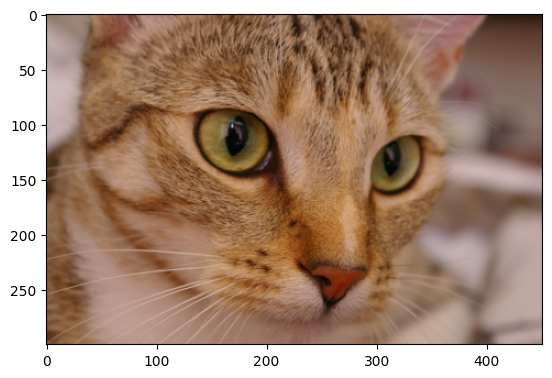

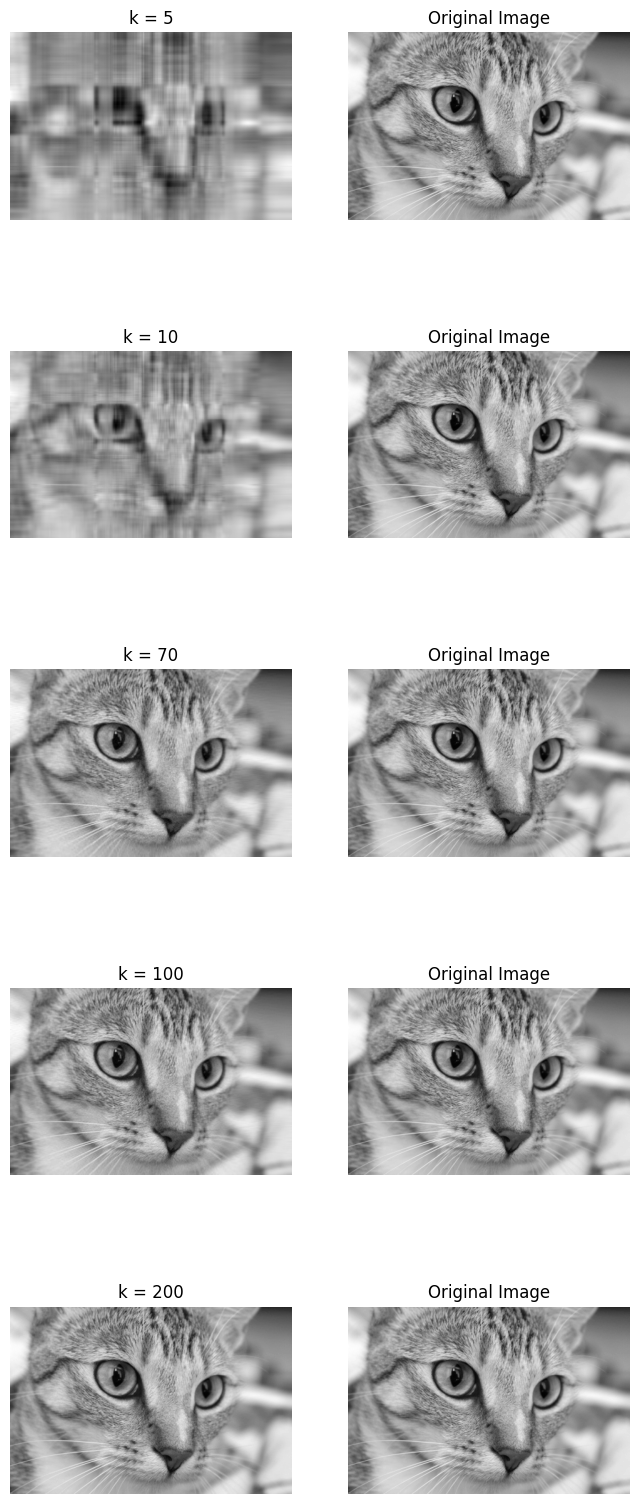

In [8]:
# Imports
 
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd
 
"""
Singular Value Decomposition of Images
"""
cat = data.chelsea()
plt.imshow(cat)
# convert to grayscale
gray_cat = rgb2gray(cat)
 
# calculate the SVD and plot the image
U, S, V_T = svd(gray_cat, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(5, 2, figsize=(8, 20))
 
curr_fig = 0
for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(cat_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = "+str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_cat, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()